In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Predicting Car Prices

In [2]:
import pandas as pd
import numpy as np

Here we are gonna try to predict car prices using the K-Neighbors algorithm. To do this, we'll use a dataset containing information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [3]:
col_name = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
pd.options.display.max_columns = 50
cars = pd.read_csv('imports-85.data', names = col_name)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We usually can't have any missing values if we want to use them for predictive modeling. Based on the dataset preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [5]:
cars.replace('?', np.nan, inplace = True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
num_col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars[num_col] = cars[num_col].astype('float64')

cars_new = cars[num_col]


We'll delete the rows where the price has a null value and replace all the other null values of the other columns with the mean of their column.

In [8]:
cars_new = cars_new.dropna(subset = ['price'])

cars_new = cars_new.fillna(cars_new.mean())

In [9]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [10]:
cars_new['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Now we normalize every columns except the price one.

In [11]:
price = cars_new['price']
cars_new = (cars_new - cars_new.min()) / (cars_new.max() - cars_new.min())
cars_new['price'] = price

Let's start with some univariate k-nearest neighbors models, which means that we'll only use 1 feature column in the predictive algorithm. We'll use the root mean square error (RMSE) to indicate the precision of our prediction.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_column, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    knn.fit(train_df[[training_column]], train_df[target_column])
    predictions = knn.predict(test_df[[training_column]])
    mse = mean_squared_error(test_df[target_column], predictions)
    return mse**0.5

In [13]:
col_try = list(cars_new.columns)
col_try.remove('price')

result_rmse = {}
for column in col_try:
    result = knn_train_test(column, 'price', cars_new)
    result_rmse[column] = result

In [14]:
result_rmse

{'normalized-losses': 8253.454114334541,
 'wheel-base': 9826.306575214263,
 'length': 8374.353066120368,
 'width': 6887.047156326528,
 'height': 10985.872731849573,
 'curb-weight': 5167.360977528007,
 'engine-size': 4316.152192097324,
 'bore': 13543.588376558973,
 'stroke': 10751.215713749045,
 'compression-rate': 8714.929418890186,
 'horsepower': 4286.5939629001805,
 'peak-rpm': 10387.965997210807,
 'city-mpg': 4805.479893654414,
 'highway-mpg': 4065.6510280618277}

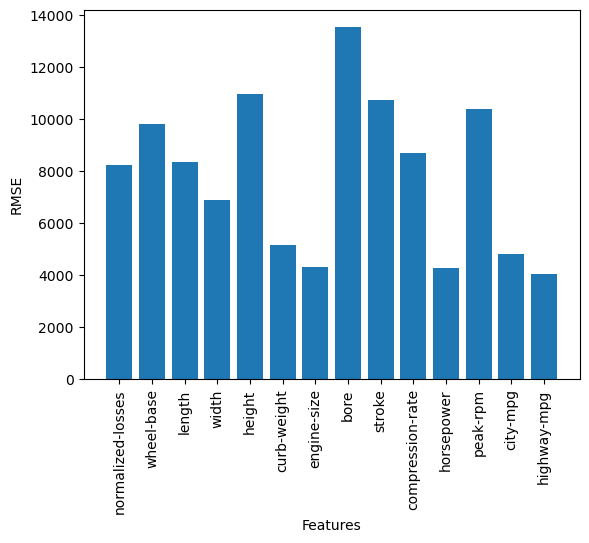

In [15]:
import matplotlib.pyplot as plt

keys = list(result_rmse.keys())
values = list(result_rmse.values())

plt.bar(keys, values)

plt.xlabel("Features")
plt.ylabel("RMSE")
plt.xticks(rotation=90)
plt.show()


With this k value, the column who performed the best is "horsepower" with a RMSE of 4286.

We'll now try for k varying from 1 to 9.

In [16]:
def knn_train_test(training_column, target_column, df):
    k_list = [i for i in range(1,10)]
    rmse = {}
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[training_column]], train_df[target_column])
        predictions = knn.predict(test_df[[training_column]])
        mse = mean_squared_error(test_df[target_column], predictions)
        rmse[k] = mse**0.5
    return rmse

In [17]:
result_rmse = {}
for column in col_try:
    result = knn_train_test(column, 'price', cars_new)
    result_rmse[column] = result

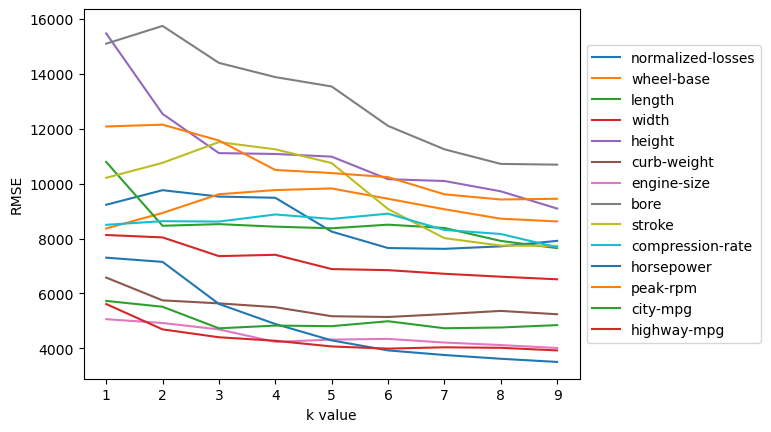

In [18]:
for k,v in result_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(list(result_rmse.keys()),loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
feature_avg_rmse = {}
for k,v in result_rmse.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

highway-mpg           4333.174402
engine-size           4432.164961
horsepower            4892.246573
city-mpg              4990.265740
curb-weight           5512.315094
width                 7167.659237
compression-rate      8490.280659
length                8560.640090
normalized-losses     8574.777508
wheel-base            9152.887655
stroke                9673.401349
peak-rpm             10602.830714
height               11142.677866
bore                 13051.810326
dtype: float64


We plotted above a graph with the evolution of the RMSE depending on the number of neighbors considered (k). Then in the table above we showed the average values of RMSE depending on k for each feature used in the algorithm. From that we can see that the best 5 features to use are: highway-mpg, engine-size, horsepower, city-mpg and curb_weight.

Now let's apply the k-neighbors algorithm using the 2 best features, then the 3 best, then the 4 best and finally the 5 best. 

In [20]:
f_temp = sorted_features.tolist()
features = [f_temp[0:i] for i in range(2,6)]

def knn_train_test(training_column, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    knn.fit(train_df[training_column], train_df[target_column])
    predictions = knn.predict(test_df[training_column])
    mse = mean_squared_error(test_df[target_column], predictions)
    return mse**0.5

plury_rmse = {}
for f in features:
    plury_rmse[tuple(f)] = knn_train_test(f,'price',cars_new)



In [21]:
plury_rmse

{('highway-mpg', 'engine-size'): 4345.122679943844,
 ('highway-mpg', 'engine-size', 'horsepower'): 3588.6763843076083,
 ('highway-mpg', 'engine-size', 'horsepower', 'city-mpg'): 3570.7785410062734,
 ('highway-mpg',
  'engine-size',
  'horsepower',
  'city-mpg',
  'curb-weight'): 3880.1932327099785}

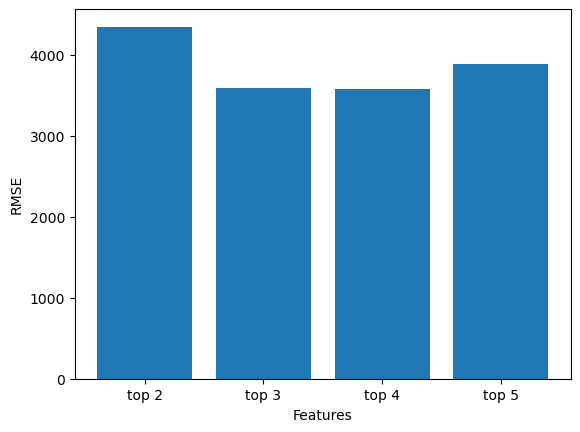

In [22]:
keys = ["top 2", "top 3", "top 4", "top 5"]
values = list(plury_rmse.values())

plt.bar(keys, values)

plt.xlabel("Features")
plt.ylabel("RMSE")
plt.show()


We'll continue to work with the "top 3", "top 4" and "top 5" layouts and vary the k value from 1 to 25 and plot the resulting RMSE values.

In [23]:
def knn_train_test(training_column, target_column, df):
    k_list = [i for i in range(1,26)]
    rmse = {}
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[training_column], train_df[target_column])
        predictions = knn.predict(test_df[training_column])
        mse = mean_squared_error(test_df[target_column], predictions)
        rmse[k] = mse**0.5
    return rmse

In [24]:
top_model = [['engine-size', 'highway-mpg', 'horsepower', 'city-mpg'],
             ['engine-size', 'highway-mpg', 'horsepower'],
             ['engine-size','highway-mpg','horsepower','city-mpg','curb-weight']]


result_rmse = {}
for column in top_model:
    result = knn_train_test(column, 'price', cars_new)
    result_rmse[tuple(column)] = result



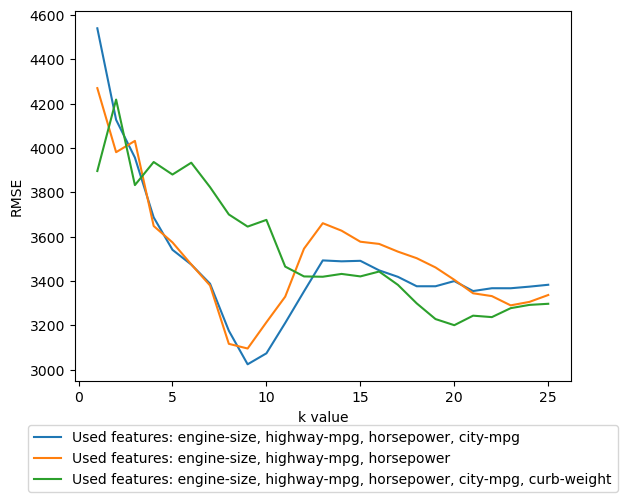

In [25]:
for k,v in result_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(['Used features: engine-size, highway-mpg, horsepower, city-mpg',
               'Used features: engine-size, highway-mpg, horsepower',
               'Used features: engine-size, highway-mpg, horsepower, city-mpg, curb-weight'],
           loc='upper center', bbox_to_anchor=(0.5, -0.1))

In [26]:
d = result_rmse[tuple(top_model[0])]
min_value = min(d.values())
k_neighbors = [k for k, v in d.items() if v == min_value][0]

print(k_neighbors)
print(min_value)

9
3024.004216580168


In conclusion, the lowest RMSE we get is 3024 with the k-nearest neighbors algorithm using the 4 following features: engine-size, highway-mpg, horsepower and city-mpg.

Compared to the mean price (13207) and the standard deviation (7947), and knowing the size of the dataset, we can say that it is not bad.